In [31]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline


In [32]:
N = 10000

sample = sps.norm.rvs(loc=0, scale=1, size=N)

#def f(sample, y):
#    return sum(map(sample, lambda x : 1 if x < y else 0)) / sample.size


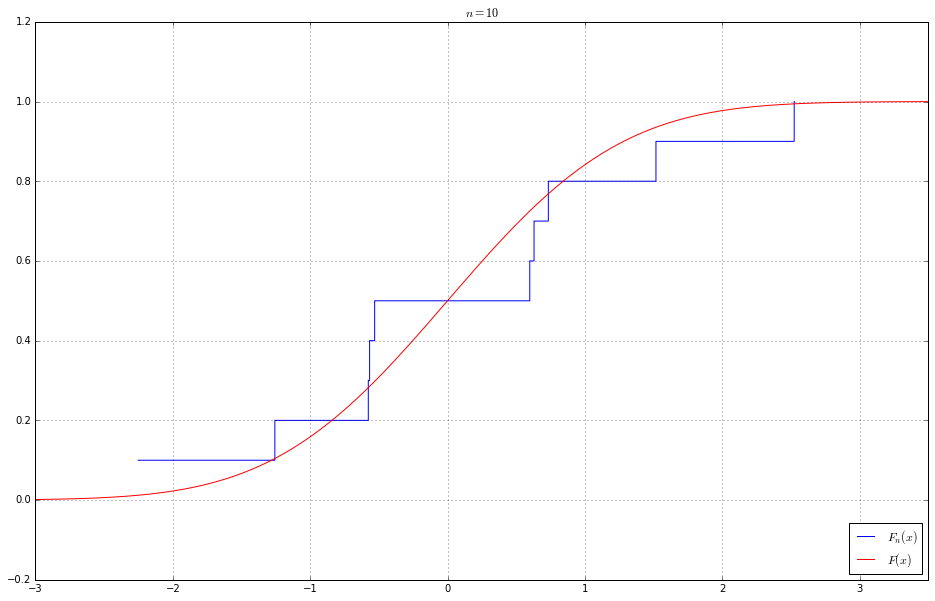

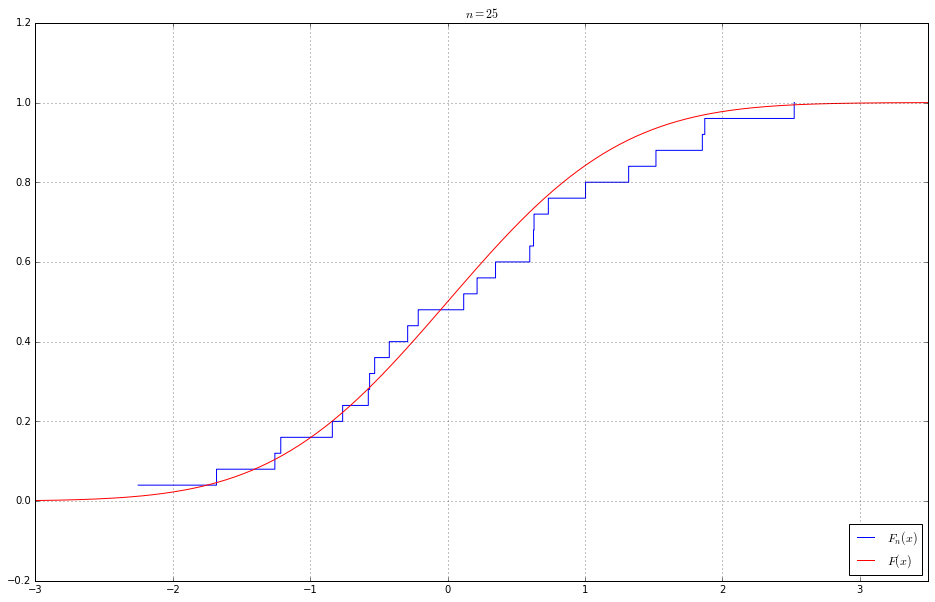

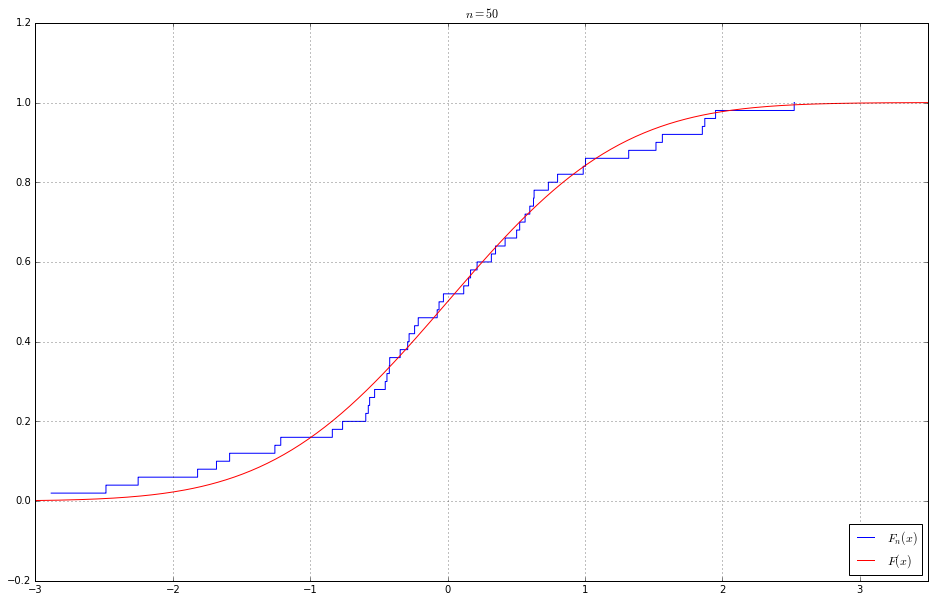

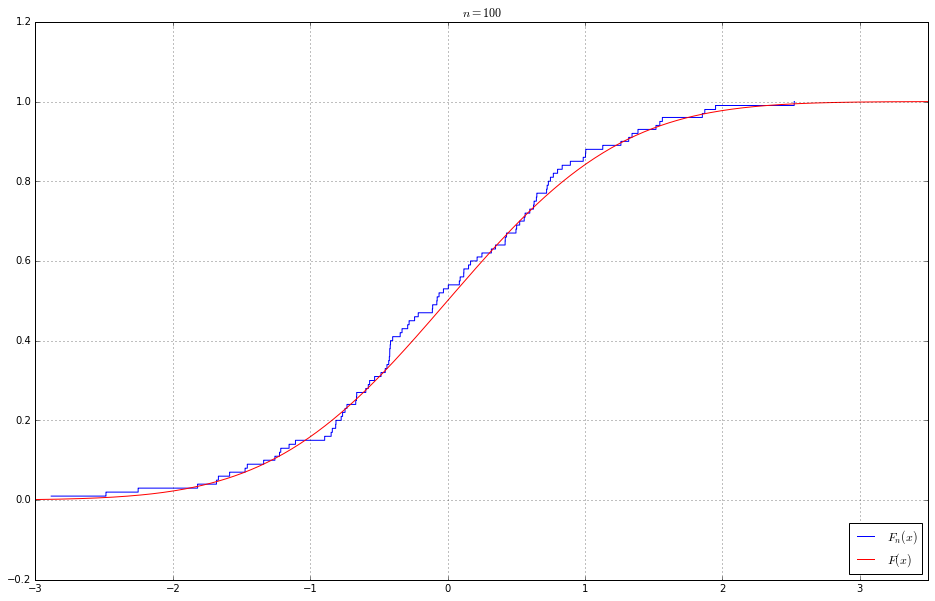

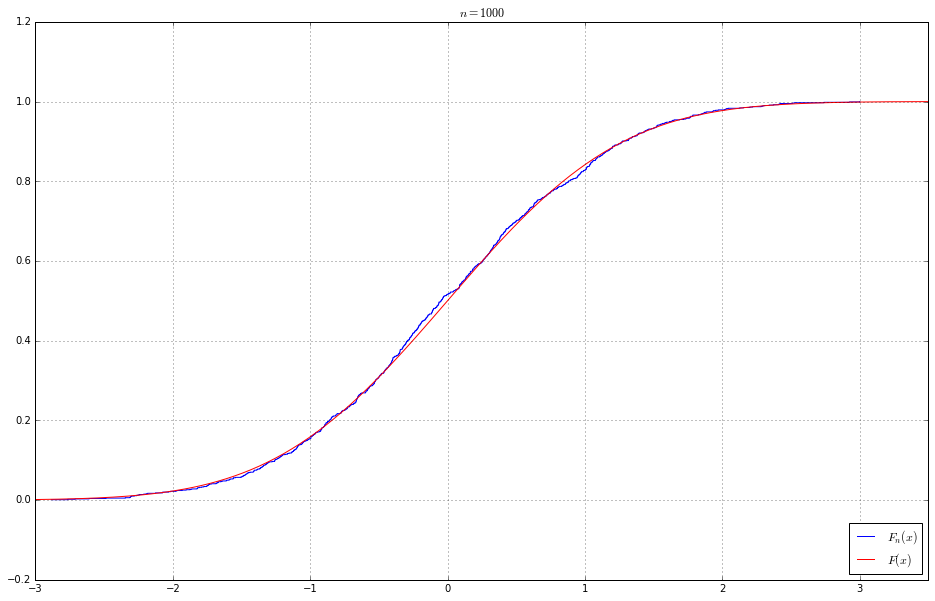

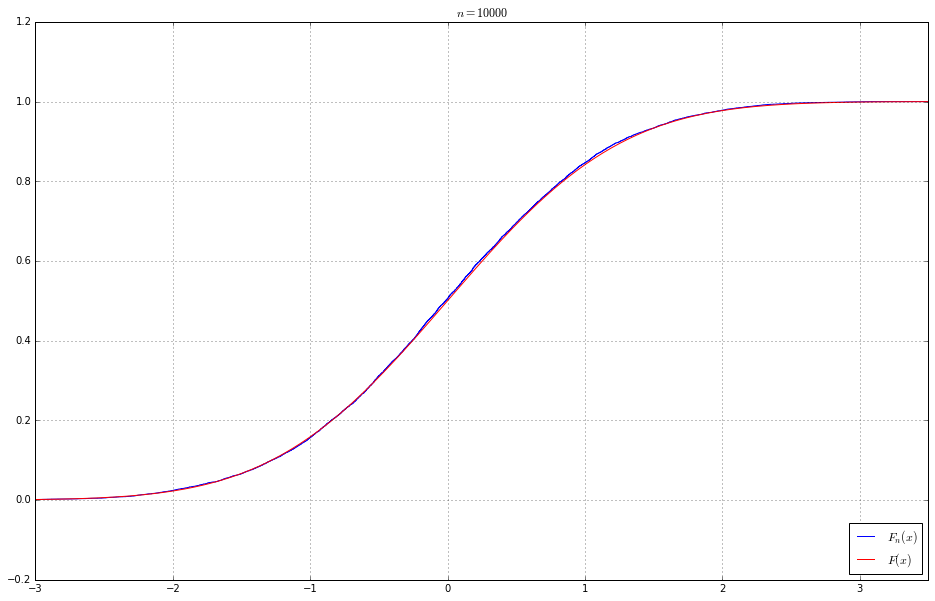

In [33]:
grid = np.linspace(-10, 10, 1000)

for n in [10, 25, 50, 100, 1000, N]:
    res = sps.cumfreq(sample[:n], numbins=N)
    emp_grid = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size,
                                            res.cumcount.size)
    
    plt.figure(figsize=(16, 10))
    plt.ylim(-0.2, 1.2)
    plt.xlim(-3, 3.5)
    plt.step(emp_grid, res.cumcount / n, label=r'$F_n(x)$')
    plt.plot(grid, sps.norm.cdf(grid), color='red', label=r'$F(x)$')
    plt.grid()
    plt.title(r'$n=' + str(n) + r'$', fontsize=16)
    plt.legend(loc=4, fontsize=16)   
    plt.show()   
        

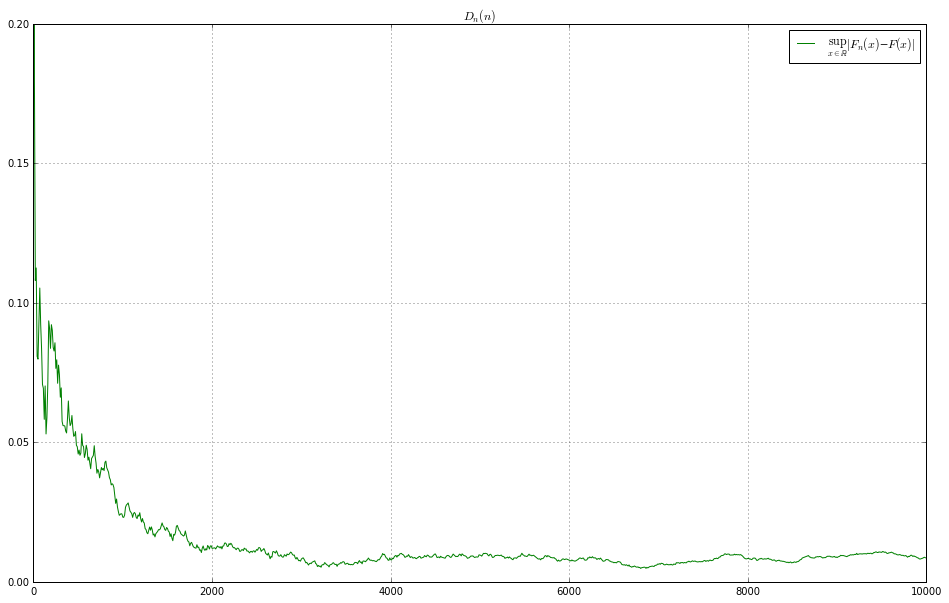

In [39]:
delta_range = np.zeros(N)

for n in range(1, N):
    res = sps.cumfreq(sample[:n], numbins=N)
    emp_grid = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size,
                                            res.cumcount.size)
    sup = 0
    for i in range(emp_grid.size):
        sup = max(sup, abs(sps.norm.cdf(emp_grid[i]) - res.cumcount[i] / n))
    #sup = max([abs(sps.norm.cdf(emp_grid[i]) - res.cumcount[i] / n) 
               #for i in range(emp_grid.size)])
    delta_range[n] = sup
    
plt.figure(figsize=(16, 10))
plt.ylim(0, 0.2)
plt.plot(range(1, N), delta_range[1:N], color='green', 
         label=r'$\sup_{x\in\mathbb{R}}|F_n(x)−F(x)|$')
plt.grid()
plt.title(r'$D_n(n)$', fontsize=16)
plt.legend(fontsize=16)
plt.show()
